# Predicting Property Sales Prices
When determining the price of a landed property, the proximity to certain high profile areas and utilities can tremendously increase their value. In this task, I will be building a model to predict the cost of certain properties.

The dataset given includes a collection of features about each property's surrounding neighbourhood, and some features that are constant across each sub area (known as a Raion). Most of the feature names are self explanatory.

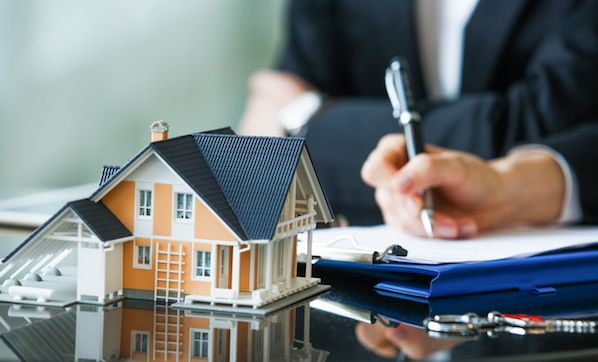

#### Importing Python Libraries

In [222]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

#### Importing my dataset

In [223]:
df = pd.read_csv("C:/Users/manny/OneDrive/C1/Data Science Fellowship/Python/Python Capstone Project/data/train.csv")

In [224]:
df.head()

,Column1,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,0,1,20/08/2011,43,27.0,4.0,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,1,2,23/08/2011,34,19.0,3.0,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,2,3,27/08/2011,43,29.0,2.0,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,3,4,01/09/2011,89,50.0,9.0,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,4,5,05/09/2011,77,77.0,4.0,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


#### Data Inspection

In [225]:
df.shape

(24376, 293)

In [226]:
# Summary statistics of my dataset

df.describe()

,Column1,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,24376.000000,24376.000000,24376.000000,19399.000000,24209.000000,14804.000000,14804.000000,1.204500e+04,14804.000000,14804.000000,...,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,2.437600e+04
mean,12187.500000,12190.396743,53.895881,34.113356,7.700153,12.489597,1.817009,3.552982e+03,1.905228,6.487368,...,31.297588,10.441459,1.707089,14.799721,29.781219,0.450115,8.416434,52.781917,6.024614,6.923943e+06
std,7036.889417,7037.059045,41.059638,57.321068,5.330278,6.712132,1.469850,1.826900e+05,0.844133,29.213506,...,71.706032,27.669122,5.277749,28.487163,46.332672,0.607486,20.091336,45.623849,4.873536,4.599307e+06
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,6093.750000,6096.750000,38.000000,20.000000,3.000000,9.000000,1.000000,1.966000e+03,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,8.000000,0.000000,0.000000,12.000000,1.000000,4.615648e+06
50%,12187.500000,12190.500000,48.000000,30.000000,7.000000,12.000000,1.000000,1.978000e+03,2.000000,6.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.100000e+06
75%,18281.250000,18284.250000,63.000000,42.000000,11.000000,17.000000,2.000000,2.003000e+03,2.000000,9.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,6.000000,76.000000,10.000000,8.000000e+06
max,24375.000000,24378.000000,5326.000000,7478.000000,77.000000,99.000000,6.000000,2.005201e+07,19.000000,2014.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [227]:
df.isna().sum().head(71)

Column1                                    0
id                                         0
timestamp                                  0
full_sq                                    0
life_sq                                 4977
                                        ... 
0_13_all                                   0
0_13_male                                  0
0_13_female                                0
raion_build_count_with_material_info    3701
build_count_block                       3701
Length: 71, dtype: int64

#### Data Cleaning

I'll start by droping the labels in which up to 20percent of their values are missing.

In [228]:
df.drop(['Column1', 'id', 'timestamp', 'life_sq', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'preschool_quota', 
         'school_quota', 'hospital_beds_raion', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame',
         'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag', 'build_count_mix', 
         'raion_build_count_with_builddate_info', 'build_count_before_1920', 'build_count_1921-1945', 'build_count_1946-1970','build_count_1971-1995',
         'build_count_after_1995'], axis = 1, inplace = True)

In [229]:
# Extract all columns whee there are missing values

df.columns[df.isnull().any()]

Index(['floor', 'metro_min_walk', 'metro_km_walk', 'railroad_station_walk_km',
       'railroad_station_walk_min', 'ID_railroad_station_walk',
       'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg',
       'cafe_avg_price_500', 'cafe_sum_1000_min_price_avg',
       'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000',
       'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg',
       'cafe_avg_price_1500', 'cafe_sum_2000_min_price_avg',
       'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000',
       'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg',
       'cafe_avg_price_3000', 'prom_part_5000', 'cafe_sum_5000_min_price_avg',
       'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000'],
      dtype='object')

In [230]:
# Print details of all columns where there are missing values

def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 264 columns and 24376 Rows.
There are 25 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
cafe_avg_price_500,0,10635,43.6,10635,43.6,float64
cafe_sum_500_min_price_avg,0,10635,43.6,10635,43.6,float64
cafe_sum_500_max_price_avg,0,10635,43.6,10635,43.6,float64
cafe_sum_1000_min_price_avg,0,5342,21.9,5342,21.9,float64
cafe_avg_price_1000,0,5342,21.9,5342,21.9,float64
cafe_sum_1000_max_price_avg,0,5342,21.9,5342,21.9,float64
cafe_avg_price_1500,0,3428,14.1,3428,14.1,float64
cafe_sum_1500_max_price_avg,0,3428,14.1,3428,14.1,float64
cafe_sum_1500_min_price_avg,0,3428,14.1,3428,14.1,float64
cafe_avg_price_2000,0,1334,5.5,1334,5.5,float64


Now drop columns with up to 1000 missing values

In [231]:
df.drop(['cafe_avg_price_500', 'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg', 'cafe_sum_1000_min_price_avg', 'cafe_avg_price_1000',
         'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1500', 'cafe_sum_1500_max_price_avg', 'cafe_sum_1500_min_price_avg', 'cafe_avg_price_2000',
         'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg'], axis = 1, inplace = True)

Drop all rows having missing values

In [232]:
df.dropna(axis=0, how='any', inplace=True)

In [233]:
df.isnull().sum().sum()

0

In [234]:
df.shape

(23451, 252)

In [235]:
df.head()

,full_sq,floor,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,43,4.0,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5,...,9,4,0,13,22,1,0,52,4,5850000
1,34,3.0,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,5,...,15,3,0,15,29,1,10,66,14,6000000
2,43,2.0,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,4,...,10,3,0,11,27,0,4,67,10,5700000
3,89,9.0,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,9,...,11,2,1,4,4,0,0,26,3,13100000
4,77,4.0,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,7,...,319,108,17,135,236,2,91,195,14,16331452


#### Data cleaning can be very exhausting. Welcome to the club!!
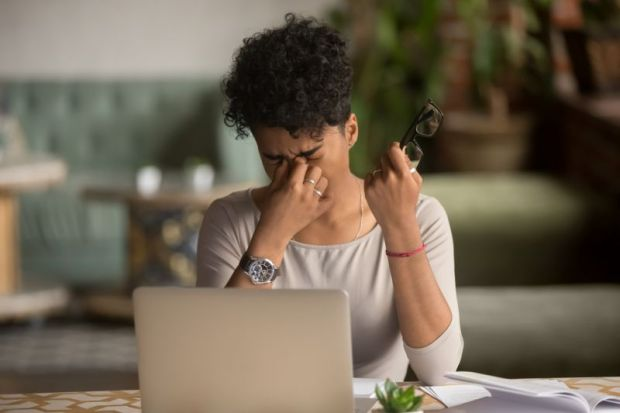

#### TRAIN THE MODEL

#### 1. Split Dataset into 'Test and Train', and Set the Dependent Column

In [236]:
from sklearn.model_selection import train_test_split
y = df['price_doc']
x = df.drop(['price_doc'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

#### 2. Encode Columns

To determine the type of encoder to use, I'll start by examining the characteristics of columns to be encoded

In [237]:
df.select_dtypes(include = 'object')

,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good
4,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24371,Investment,Birjulevo Zapadnoe,no,yes,yes,no,yes,no,no,no,no,no,no,no,satisfactory
24372,Investment,Ramenki,yes,no,no,no,yes,no,no,no,no,yes,no,no,satisfactory
24373,OwnerOccupier,Poselenie Vnukovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
24374,OwnerOccupier,Poselenie Desjonovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data


In [238]:
df['product_type'].value_counts()

Investment       15770
OwnerOccupier     7681
Name: product_type, dtype: int64

In [239]:
df['sub_area'].value_counts() 

Nekrasovka                  1473
Poselenie Sosenskoe         1373
Poselenie Vnukovskoe         765
Poselenie Moskovskij         691
Poselenie Voskresenskoe      643
                            ... 
Arbat                         13
Poselenie Filimonkovskoe       7
Vostochnoe                     5
Poselenie Pervomajskoe         5
Poselenie Voronovskoe          1
Name: sub_area, Length: 135, dtype: int64

In [240]:
df['ecology'].value_counts() 

poor            6454
good            6044
no data         4956
excellent       3044
satisfactory    2953
Name: ecology, dtype: int64

#### One-Hot Encoder
I'll be using One-hot encoder for the columns two(2) different categories. 
That includes the following columns, product_type, culture_objects_top_25, thermal_power_plant_raion, incineration_raion, oil_chemistry_raion, radiation_raion, railroad_terminal_raion, big_market_raion, nuclear_reactor_raion, detention_facility_raion, water_1line, big_road1_1line, railroad_1line

In [241]:
import category_encoders as ce
ce_one = ce.OneHotEncoder(cols=['product_type', 'culture_objects_top_25', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion',
                                'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
                                'water_1line', 'big_road1_1line', 'railroad_1line']) #Instanciating the one-hot encoder

x_train = ce_one.fit_transform(x_train)

C:\Users\manny\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


#### Ordinal Encoder
Ordinal Encoder is the same as Label Encoder, only that they are from different libraries. I'll be applying it to the 'ecology' column.

In [242]:
ce_ordinal = ce.OrdinalEncoder('ecology') #Instanciating the ordinal encoder

x_train = ce_ordinal.fit_transform(x_train)

#### BaseN Encoder
It is ideal for columns with large categorical types. I will be applying it to the 'sub_area' column.

In [243]:
ce_baseN5 = ce.BaseNEncoder('sub_area', base = 5) #Instanciating the BaseN encoder

x_train = ce_baseN5.fit_transform(x_train)

C:\Users\manny\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [244]:
x_train.head(10)

,full_sq,floor,product_type_1,product_type_2,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
10638,38,4.0,1,0,1,4.808270e+06,101708,0.112560,0.118537,5879,...,28,12,2,0,8,25,0,4,64,12
5449,39,7.0,0,1,2,2.615514e+07,178264,0.137846,0.041116,14080,...,1,1,0,0,0,2,0,0,3,1
321,50,9.0,1,0,3,7.128794e+06,145576,0.075790,0.100456,5594,...,17,6,2,0,5,13,0,2,45,7
11550,73,15.0,1,0,4,1.175477e+07,247469,0.188713,0.090799,19223,...,29,7,1,0,11,31,0,6,64,11
6861,38,13.0,1,0,5,7.587523e+06,102590,0.398794,0.000000,6273,...,28,5,1,0,9,21,0,1,51,8
15490,39,17.0,0,1,6,1.139168e+07,19940,0.055644,0.243205,1706,...,4,1,0,0,2,3,0,0,6,1
21939,36,11.0,1,0,7,6.407578e+06,155572,0.189727,0.000070,9576,...,43,11,4,0,14,23,1,0,52,5
8764,40,8.0,0,1,8,6.677245e+07,9553,0.336177,0.072158,656,...,5,2,2,0,1,12,1,0,8,0
11650,45,1.0,0,1,9,5.299528e+07,13890,0.349935,0.011654,953,...,1,2,1,0,0,9,0,0,0,0
18633,52,15.0,0,1,10,1.132409e+07,113897,0.083810,0.371149,8340,...,12,7,2,0,5,14,0,3,17,2


In [245]:
x_train.dtypes.tail(20)

office_sqm_5000                  int64
trc_count_5000                   int64
trc_sqm_5000                     int64
cafe_count_5000                  int64
cafe_sum_5000_min_price_avg    float64
cafe_sum_5000_max_price_avg    float64
cafe_avg_price_5000            float64
cafe_count_5000_na_price         int64
cafe_count_5000_price_500        int64
cafe_count_5000_price_1000       int64
cafe_count_5000_price_1500       int64
cafe_count_5000_price_2500       int64
cafe_count_5000_price_4000       int64
cafe_count_5000_price_high       int64
big_church_count_5000            int64
church_count_5000                int64
mosque_count_5000                int64
leisure_count_5000               int64
sport_count_5000                 int64
market_count_5000                int64
dtype: object

#### 3. Building the Model

#### Using Linear Regression
I will be using linear regression in building my model since this is a regression task.

In [246]:
from sklearn.linear_model import LinearRegression
lr_df = LinearRegression() #instantiate the regression model
lr_df.fit(x_train, y_train)

LinearRegression()

#### Encode x_test

In [247]:
x_test = ce_one.transform(x_test)
x_test = ce_ordinal.transform(x_test)
x_test = ce_baseN5.transform(x_test)

In [248]:
lr_pred_price = lr_df.predict(x_test)

#### Using Random Forest Regressor

In [253]:
from sklearn.ensemble import RandomForestRegressor

df_forest= RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=42)
df_forest.fit (x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=42)

In [254]:
forest_pred_price = df_forest.predict(x_test)

#### EVALUATE THE MODEL
I will be applying the **R Squared (R2)** methods in determining how close my predictions are to the actual values.

In [251]:
# Evaluating the linear regression model

from sklearn.metrics import r2_score
r2_score(y_test, lr_pred_price)

0.3019459916254331

Note: The closer the r2 score is to '1', the better your model prediction. Right now the prediction rate for my linear regression model is at 30percent which is really poor. Therefore, I'll have to tune my model's Hyperparameters to improve my prediction rate, or try using a different model.

In [255]:
# Evaluating the random forest regression model

r2_score(y_test, forest_pred_price)

0.5992957545586933

My model seems to be doing better using the random forest regressor. Like I said earlier, I could still adjust the hyerparameters to improve the performance of my model.

Note that random forest models do take longer time training when we have large data set.

#### I'll be sticking to the result from my random forest regression model. Now I would compare my Predicted Price ('pred_price') to the Original Price ('actual_price')

In [256]:
forest_pred_price = np.round(forest_pred_price, decimals = 0)

In [257]:
x_test['pred_price'] = forest_pred_price
x_test['actual_price'] = y_test

x_test.head(20)

,full_sq,floor,product_type_1,product_type_2,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,pred_price,actual_price
8049,43,5.0,1,0,94,1.844581e+07,83369,0.030697,0.428826,4615,...,3,0,9,30,0,7,70,13,4607669.0,1000000
22402,95,22.0,0,1,24,1.258354e+07,178473,0.194703,0.069753,13087,...,4,1,5,7,0,1,42,6,11747810.0,13153710
21952,32,9.0,1,0,102,1.005305e+07,175518,0.096270,0.300323,9753,...,3,0,13,29,1,5,87,8,4918468.0,5500000
4546,44,23.0,0,1,11,2.553630e+07,4001,0.496315,0.007122,275,...,1,0,1,7,0,0,6,0,4247805.0,4212183
5393,51,6.0,0,1,11,2.553630e+07,4001,0.496315,0.007122,275,...,1,0,2,12,0,0,9,0,5049288.0,4239994
4279,28,1.0,1,0,27,1.788191e+07,165727,0.260653,0.133215,10809,...,2,0,7,26,0,3,58,12,4215136.0,4560000
21243,50,7.0,1,0,95,7.126815e+06,87713,0.125882,0.458174,4533,...,4,0,12,14,0,0,45,3,6461415.0,2000000
1700,30,4.0,1,0,117,1.250576e+07,61396,0.403651,0.049863,3155,...,9,3,24,60,2,14,112,8,5493484.0,5550000
22916,74,6.0,0,1,6,1.139168e+07,19940,0.055644,0.243205,1706,...,0,0,2,3,0,0,6,1,6942070.0,7263300
6846,63,14.0,0,1,19,2.149409e+07,7122,0.262459,0.017647,489,...,0,0,1,7,1,0,12,1,5671019.0,5866250


#### USE THE MODEL
Now I am ready test my model on an unseen dataset. In machine learning, this process is often called Model Inference.

In [271]:
# Import my test dataset

df_test = pd.read_csv("C:/Users/manny/OneDrive/C1/Data Science Fellowship/Python/Python Capstone Project/data/test.csv")

In [272]:
df_test.head()

,Column1,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,24376,24379,06/11/2014,39,39.0,14,25,1,2014.0,1,...,1,0,0,4,6,0,0,5,1,4819000
1,24377,24380,06/11/2014,77,73.0,3,1,1,NaN,3,...,0,0,0,1,3,0,2,10,1,8003100
2,24378,24381,06/11/2014,59,39.0,5,9,1,1976.0,3,...,23,8,1,14,24,0,3,91,14,10900000
3,24379,24382,06/11/2014,40,NaN,14,17,1,NaN,1,...,1,1,0,2,12,0,0,9,0,4626322
4,24380,24383,06/11/2014,107,61.0,21,24,6,2007.0,3,...,111,33,3,83,138,1,31,124,19,2000000


#### Data Inspection

In [273]:
df_test.shape

(6095, 293)

In [274]:
df_test.isna().sum().head(71)

Column1                                    0
id                                         0
timestamp                                  0
full_sq                                    0
life_sq                                 1406
                                        ... 
0_13_all                                   0
0_13_male                                  0
0_13_female                                0
raion_build_count_with_material_info    1290
build_count_block                       1290
Length: 71, dtype: int64

#### Data Cleaning

Drop columns with up to 1000 missing values

In [276]:
df_test.drop(['Column1', 'id', 'timestamp', 'life_sq', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'preschool_quota', 
         'school_quota', 'hospital_beds_raion', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame',
         'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag', 'build_count_mix', 
         'raion_build_count_with_builddate_info', 'build_count_before_1920', 'build_count_1921-1945', 'build_count_1946-1970','build_count_1971-1995',
         'build_count_after_1995', 'cafe_avg_price_500', 'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg', 'cafe_sum_1000_min_price_avg', 
         'cafe_avg_price_1000', 'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1500', 'cafe_sum_1500_max_price_avg', 'cafe_sum_1500_min_price_avg',
         'cafe_avg_price_2000', 'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg'], axis = 1, inplace = True)

Drop all rows having missing values

In [277]:
df_test.dropna(axis=0, how='any', inplace=True)

In [279]:
# Extract all columns whee there are missing values

df_test.columns[df_test.isnull().any()]

Index([], dtype='object')

In [281]:
df_test.isnull().sum().sum()

0

In [282]:
df_test.shape

(5820, 252)

In [283]:
df_test.head()

,full_sq,floor,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,39,14,OwnerOccupier,Nekrasovka,1.139168e+07,19940,0.055644,0.243205,1706,5,...,1,0,0,4,6,0,0,5,1,4819000
1,77,3,OwnerOccupier,Krjukovo,1.084231e+07,85219,0.062172,0.161532,5767,6,...,0,0,0,1,3,0,2,10,1,8003100
2,59,5,Investment,Vojkovskoe,5.333221e+06,64931,0.074077,0.169091,3905,6,...,23,8,1,14,24,0,3,91,14,10900000
3,40,14,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,0.007122,275,0,...,1,1,0,2,12,0,0,9,0,4626322
4,107,21,Investment,Taganskoe,8.087656e+06,116742,0.048011,0.007659,6694,5,...,111,33,3,83,138,1,31,124,19,2000000


In [284]:
# Dropping the 'price_doc' column to be predicted.

test_y = df_test['price_doc']
test_x = df_test.drop('price_doc', axis = 1)

#### Encoding my dataset

In [285]:
# Using One-hot encoding
test_x = ce_one.transform(test_x)

In [286]:
# Using Ordinal encoding
test_x = ce_ordinal.transform(test_x)

In [287]:
test_x = ce_baseN5.transform(test_x)

In [288]:
test_x.head(10)

,full_sq,floor,product_type_1,product_type_2,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,39,14,0,1,6.0,1.139168e+07,19940,0.055644,0.243205,1706,...,5,1,0,0,4,6,0,0,5,1
1,77,3,0,1,44.0,1.084231e+07,85219,0.062172,0.161532,5767,...,3,0,0,0,1,3,0,2,10,1
2,59,5,1,0,98.0,5.333221e+06,64931,0.074077,0.169091,3905,...,70,23,8,1,14,24,0,3,91,14
3,40,14,0,1,11.0,2.553630e+07,4001,0.496315,0.007122,275,...,5,1,1,0,2,12,0,0,9,0
4,107,21,1,0,22.0,8.087656e+06,116742,0.048011,0.007659,6694,...,261,111,33,3,83,138,1,31,124,19
5,36,3,1,0,4.0,1.175477e+07,247469,0.188713,0.090799,19223,...,22,5,1,0,10,26,0,3,50,9
6,32,3,1,0,107.0,4.602090e+06,130229,0.114157,0.000000,8450,...,23,7,2,0,7,14,0,2,44,11
7,96,2,1,0,97.0,3.998216e+06,64317,0.258712,0.014423,3977,...,118,47,8,2,23,43,1,14,83,12
8,43,10,0,1,8.0,6.677245e+07,9553,0.336177,0.072158,656,...,6,2,2,0,1,12,1,0,7,0
9,38,6,1,0,49.0,1.488362e+07,72131,0.024444,0.158249,7567,...,11,1,1,0,5,9,0,2,17,6


In [289]:
test_x.dtypes.tail(20)

office_sqm_5000                  int64
trc_count_5000                   int64
trc_sqm_5000                     int64
cafe_count_5000                  int64
cafe_sum_5000_min_price_avg    float64
cafe_sum_5000_max_price_avg    float64
cafe_avg_price_5000            float64
cafe_count_5000_na_price         int64
cafe_count_5000_price_500        int64
cafe_count_5000_price_1000       int64
cafe_count_5000_price_1500       int64
cafe_count_5000_price_2500       int64
cafe_count_5000_price_4000       int64
cafe_count_5000_price_high       int64
big_church_count_5000            int64
church_count_5000                int64
mosque_count_5000                int64
leisure_count_5000               int64
sport_count_5000                 int64
market_count_5000                int64
dtype: object

#### Predicting Prices using my new dataset

In [290]:
# Applying the Random Forest Regression Model that I developed earlier

forest_pred_price_test = df_forest.predict(test_x)

In [294]:
# Evaluating the random forest regression model

r2_score(test_y, forest_pred_price_test)

0.6762043863129796

In [292]:
forest_pred_price_test = np.round(forest_pred_price_test, decimals = 0)

In [293]:
test_x['pred_price'] = forest_pred_price_test
test_x['actual_price'] = test_y

test_x.head(20)

,full_sq,floor,product_type_1,product_type_2,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,pred_price,actual_price
0,39,14,0,1,6.0,1.139168e+07,19940,0.055644,0.243205,1706,...,0,0,4,6,0,0,5,1,4210458.0,4819000
1,77,3,0,1,44.0,1.084231e+07,85219,0.062172,0.161532,5767,...,0,0,1,3,0,2,10,1,8012739.0,8003100
2,59,5,1,0,98.0,5.333221e+06,64931,0.074077,0.169091,3905,...,8,1,14,24,0,3,91,14,8396251.0,10900000
3,40,14,0,1,11.0,2.553630e+07,4001,0.496315,0.007122,275,...,1,0,2,12,0,0,9,0,4673917.0,4626322
4,107,21,1,0,22.0,8.087656e+06,116742,0.048011,0.007659,6694,...,33,3,83,138,1,31,124,19,21109082.0,2000000
5,36,3,1,0,4.0,1.175477e+07,247469,0.188713,0.090799,19223,...,1,0,10,26,0,3,50,9,5683517.0,1500000
6,32,3,1,0,107.0,4.602090e+06,130229,0.114157,0.000000,8450,...,2,0,7,14,0,2,44,11,4827566.0,5900000
7,96,2,1,0,97.0,3.998216e+06,64317,0.258712,0.014423,3977,...,8,2,23,43,1,14,83,12,18157374.0,21000000
8,43,10,0,1,8.0,6.677245e+07,9553,0.336177,0.072158,656,...,2,0,1,12,1,0,7,0,4692228.0,5391090
9,38,6,1,0,49.0,1.488362e+07,72131,0.024444,0.158249,7567,...,1,0,5,9,0,2,17,6,4958168.0,6150000


#### And my job here is done!!!
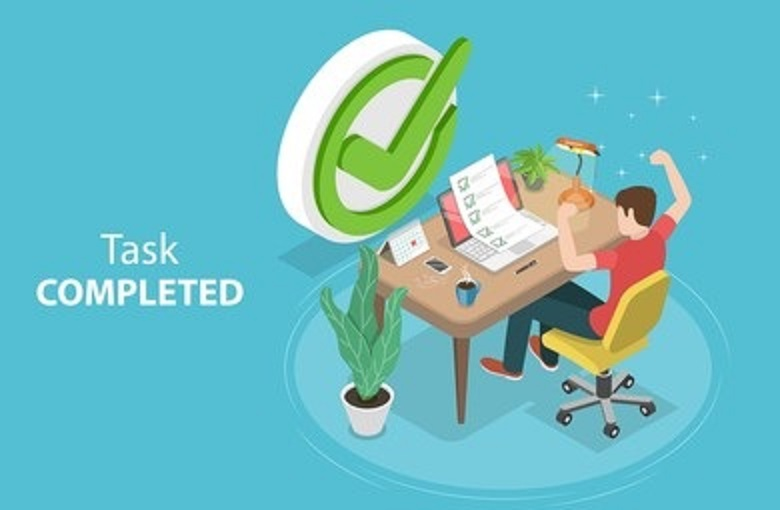